In [1]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import scipy.sparse as sp
from random import *
from copy import deepcopy

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
#Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X, y_true = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

df= pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.506390,-0.057663,1.643606,4.426560,0.564538
1,-9.304401,7.410423,2.634051,1.421497,6.529532
2,-2.874097,2.395984,1.424139,3.999277,0.486795
3,-1.747953,0.712163,0.784197,4.408828,0.959651
4,-1.409234,8.909214,7.602814,-0.969191,2.647356
...,...,...,...,...,...
3995,-3.124214,9.833733,7.872693,-1.033497,2.852330
3996,-3.138745,9.688679,7.624227,-1.525713,3.853165
3997,-1.284945,0.625381,1.833122,4.583487,0.905785
3998,-2.542347,-0.165675,2.671166,5.036737,0.871050


In [71]:
# KMeans with visualization and elbow method (Plotly API with username needed for chart_studio to work)

import chart_studio

import pandas as pd
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot


class KMeans_own:
    def __init__(self, k=4, tol=0, n_iter=10):
        self.k = k
        self.n_iter= n_iter
        self.tol = tol
    
    def fit_predict(self, data):
        self.data = data
        # Select random centroids from data
        centroids = np.empty([self.k, self.data.shape[1]])
        for i in range(self.k):
            centroids[i] = self.data[randint(0, len(self.data)-1)]

        centroids_old = np.empty([self.k, self.data.shape[1]])
        error = np.linalg.norm(centroids - centroids_old)
        
        for n in range(self.n_iter):
            while error > self.tol: 
                clusters = {}
                cluster_numbers = []
                cluster_dist = []
                for cl in range(self.k):
                    clusters[cl] = [] 
                
                # measure distance between centroids and each data point
                for d in self.data:
                    euc_dist = []
                    for j in range(self.k):
                        euc_dist.append(np.linalg.norm(d - centroids[j]))
                    # select centroid with minimum distance between centroid and data point
                    clusters[euc_dist.index(min(euc_dist))].append(d)
                    cluster_numbers.append(euc_dist.index(min(euc_dist)))
                    cluster_dist.append(min(euc_dist))
                centroids_old = deepcopy(centroids)
                KMeans_own.cluster_numbers_ = cluster_numbers
                KMeans_own.inertia_ = sum(i*i for i in cluster_dist)
                
                # calculate mean of cluster and set it as new centroid
                for i in range(self.k):
                    centroids[i] = np.average(clusters[i], axis=0)
                
                # calculate difference between new centroid and centroid from
                # previous iteration
                error = np.linalg.norm((centroids - centroids_old) / centroids )
              
        KMeans_own.cluster_centers_ = centroids
        return self    

    def visualization(self, data):
        self.data = data
        #Set marker properties
        self.markersize = self.data[:, 3] +12
        self.markercolor = KMeans_own.cluster_numbers_

        #Make Plotly figure
        fig1 = go.Scatter3d(x=self.data[:,0],
                            y=self.data[:, 1],
                            z=self.data[:, 2],
                            marker=dict(size=self.markersize,
                                        color=self.markercolor,
                                        opacity=0.9,
                                        reversescale=True,
                                        colorscale='turbo'),
                            line=dict (width=0.02),
                            mode='markers')

        fig2 = go.Scatter3d(x=KMeans_own.cluster_centers_[:, 0],
                            y=KMeans_own.cluster_centers_[:, 1],
                            z=KMeans_own.cluster_centers_[:, 2],
                            marker=dict(size= 5,
                                        color='red',
                                        opacity=0.9,
                                        reversescale=True,
                                        ),
                            line=dict (width=0.02),
                            mode='markers')

        plots = [fig1, fig2]

        #Make Plot.ly Layout
        mylayout = go.Layout(scene=dict(xaxis=dict( title="column 0"),
                                        yaxis=dict( title="column 1"),
                                        zaxis=dict(title="column 2")),)

        #Plot and save html
        plotly.offline.plot({"data": [fig1, fig2],
                            "layout": mylayout},
                            auto_open=True,
                            filename=("4DPlot.html"))


        fig = go.Figure(data=plots, layout=mylayout)
        return fig
        #py.iplot(fig, filename='4DPlot.html')

    def elbow(self, X):
        elbow=[]
        for i in range(1, 20):
            kmeans = KMeans_own(k = i, tol=0, n_iter=70)
            kmeans.fit_predict(X)
            elbow.append(KMeans_own.inertia_)
        sns.lineplot(range(1, 20), elbow,color='blue')
        plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
        plt.title('ELBOW METHOD')
        return plt.show();


In [58]:
model = KMeans_own(k=4, tol=0, n_iter=100).fit_predict(X)
centers = KMeans_own.cluster_centers_
centers

array([[-8.56310668,  8.48371073,  1.37289887,  0.59041155,  5.83953874],
       [-1.56369008,  0.89188882,  2.03997632,  4.29030639,  0.9951018 ],
       [ 7.3959297 ,  5.57285926,  6.64861867, -9.59332317, -8.21547147],
       [-2.33516784,  9.29195226,  7.80724118, -1.28401233,  2.90403444]])

In [59]:
model.visualization(X)

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



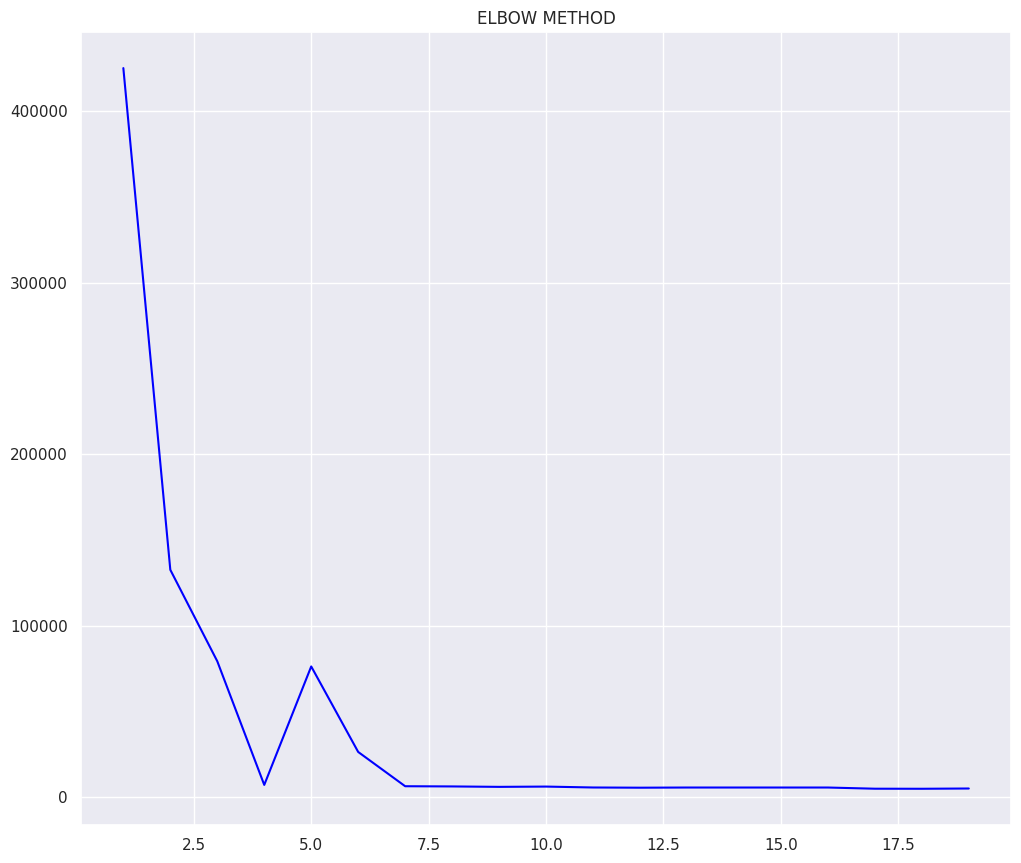

In [72]:
KMeans_own(n_iter=100).elbow(X)

FROM HERE JUST BACKUP

In [20]:
# KMeans

class KMeans_own:
    def __init__(self, k, tol=0, n_iter=10):
        self.k = k
        self.n_iter= n_iter
        self.tol = tol
    
    def fit_predict(self, data):
        # Select random centroids from data
        centroids = np.empty([self.k, data.shape[1]])
        for i in range(self.k):
            centroids[i] = data[randint(0, len(data)-1)]

        centroids_old = np.empty([self.k, data.shape[1]])
        error = np.linalg.norm(centroids - centroids_old)
        
        for n in range(self.n_iter):
            while error > self.tol: 
                clusters = {}
                cluster_numbers = []
                cluster_dist = []
                for cl in range(self.k):
                    clusters[cl] = [] 
                
                # measure distance between centroids and each data point
                for d in data:
                    euc_dist = []
                    for j in range(self.k):
                        euc_dist.append(np.linalg.norm(d - centroids[j]))
                    # select centroid with minimum distance between centroid and data point
                    clusters[euc_dist.index(min(euc_dist))].append(d)
                    cluster_numbers.append(euc_dist.index(min(euc_dist)))
                    cluster_dist.append(min(euc_dist))
                centroids_old = deepcopy(centroids)
                KMeans_own.cluster_numbers_ = cluster_numbers
                KMeans_own.inertia_ = sum(i*i for i in cluster_dist)
                
                # calculate mean of cluster and set it as new centroid
                for i in range(self.k):
                    centroids[i] = np.average(clusters[i], axis=0)
                
                # calculate difference between new centroid and centroid from
                # previous iteration
                error = np.linalg.norm((centroids - centroids_old) / centroids )
              
        KMeans_own.cluster_centers_ = centroids 
        return self       


In [55]:
KMeans_own(k=4, tol=0, n_iter=100).fit_predict(X)
centers = KMeans_own.cluster_centers_
clusters = KMeans_own.cluster_numbers_
centers

array([[-1.56369008,  0.89188882,  2.03997632,  4.29030639,  0.9951018 ],
       [-2.33516784,  9.29195226,  7.80724118, -1.28401233,  2.90403444],
       [ 7.3959297 ,  5.57285926,  6.64861867, -9.59332317, -8.21547147],
       [-8.56310668,  8.48371073,  1.37289887,  0.59041155,  5.83953874]])

In [56]:
# Showing clusters and centers in 4D graph

import chart_studio

import pandas as pd
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot


#Set marker properties
markersize = df[3] +12
markercolor = clusters

#Make Plotly figure
fig1 = go.Scatter3d(x=df[0],
                    y=df[1],
                    z=df[2],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='turbo'),
                    line=dict (width=0.02),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:, 0],
                    y=centers[:, 1],
                    z=centers[:, 2],
                    marker=dict(size= 5,
                                color='red',
                                opacity=0.9,
                                reversescale=True,
                                ),
                    line=dict (width=0.02),
                    mode='markers')

plots = [fig1, fig2]

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="column 0"),
                                yaxis=dict( title="column 1"),
                                zaxis=dict(title="column 2")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))


fig = go.Figure(data=plots, layout=mylayout)
py.iplot(fig, filename='4DPlot.html')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


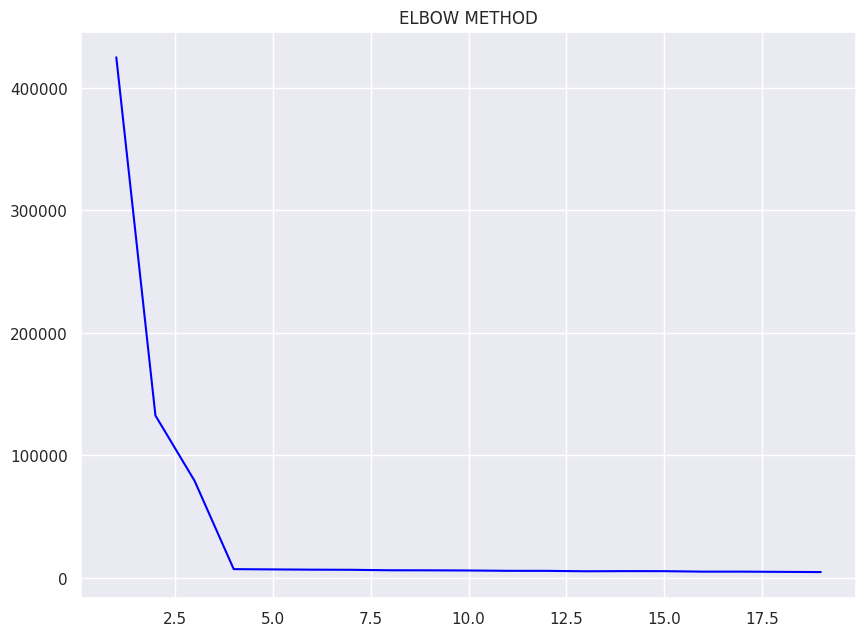

In [ ]:
# Testing for best number of clusters with elbow method

elbow=[]
for i in range(1, 20):
    kmeans = KMeans_own(k = i, tol=0, n_iter=50)
    kmeans.fit_predict(X)
    elbow.append(KMeans_own.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show();

In [ ]:
# Code with png and gif export

import imageio


class KMeans_own:
    def __init__(self, k, tol=0, n_iter=10):
        self.k = k
        self.n_iter= n_iter
        self.tol = tol
    
    def fit_predict(self, data):
        # Select random centroids from data
        centroids = np.empty([self.k, data.shape[1]])
        for i in range(self.k):
            centroids[i] = data[randint(0, len(data)-1)]

        centroids_old = np.empty([self.k, data.shape[1]])
        error = np.linalg.norm(centroids - centroids_old)
        
        for n in range(self.n_iter):
            while error > self.tol: 
                clusters = {}
                cluster_numbers = []
                for cl in range(self.k):
                    clusters[cl] = [] 
                
                # measure distance between centroids and each data point
                for d in data:
                    euc_dist = []
                    for j in range(self.k):
                        euc_dist.append(np.linalg.norm(d - centroids[j]))
                    # select centroid with minimum distance between centroid and data point
                    clusters[euc_dist.index(min(euc_dist))].append(d)
                    cluster_numbers.append(euc_dist.index(min(euc_dist)))
                centroids_old = deepcopy(centroids)
                KMeans_own.cluster_numbers_ = cluster_numbers
                
                # calculate mean of cluster and set it as new centroid
                for i in range(self.k):
                    centroids[i] = np.average(clusters[i], axis=0)
                
                # calculate difference between new centroid and centroid from
                # previous iteration
                error = np.linalg.norm((centroids - centroids_old) / centroids )
              
        KMeans_own.cluster_centers_ = centroids 

KMeans_own(k=4, tol=0, n_iter=100).fit_predict(X)
centroids = KMeans_own.cluster_centers_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis') # show data
cent_graph = ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5) # show centers
# create file name and append it to a list
filenames = []
filename = 'Clusters_centers.png'
filenames.append(filename)

# save frame
plt.savefig(f'./img/{filename}')
plt.close()
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(f'./img/{filename}')
        writer.append_data(image)
